In [5]:

import matplotlib.pyplot as plt
import pandas as pd
import os
import mplcursors

In [32]:
#merging all the monthly sales data into a single file

files = [file for file in os.listdir('C:/Users/User/Documents/Sales_Data')]
all_months_data=pd.DataFrame()

for file in files:
    df= pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.head()
                       
                   
                         


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#cleaning data, to deal with missing values

In [36]:
all_data = all_months_data.dropna(how= 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#we have data of few months in the form of string values(Order Date)

In [40]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#some of the numerical data is in the string format, so here we gonna convert them to int using pandas

In [41]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#adding an extra column of month, so that data seggregation is easy.

In [78]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"


#detreming the month which has best sales


#adding an extra row with total order values

In [79]:
all_data['Total sales'] = all_data['Quantity Ordered']*all_data['Price Each']
best_sales = all_data.groupby('Month').sum()
best_sales.head()

,Quantity Ordered,Price Each,Total sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


Text(0.5, 1.0, 'Sales report of the year')

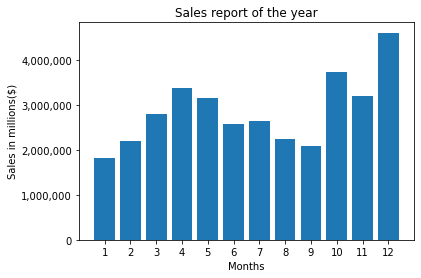

In [81]:
#####Visualisation with Bar chart
months = range(1,13)
month_names = []
month_names = ['Dummy', 'January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
highest_sale = int(best_sales['Total sales'].max())
sales = range(1000000,round(highest_sale)+ 1000000 , 1000000)

fig, ax = plt.subplots()
plt.bar(months, best_sales['Total sales'])
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(months)
plt.ylabel('Sales in millions($)')
plt.xlabel('Months')
plt.title('Sales report of the year')


To determine the city with best sales , we are creating a new column of cities

In [82]:
#Which city have the highest sales
#For this analysis we need a column of city

all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1] + (',') + x.split(',')[2].split(' ')[1])
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas,TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston,MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles,CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles,CA"


In [83]:
best_sales_city = all_data.groupby('City').sum()
best_sales_city.head()

,Quantity Ordered,Price Each,Month,Total sales
City,,,,
"Atlanta,GA",16602,2.779908e+06,104794,2.795499e+06
"Austin,TX",11153,1.809874e+06,69829,1.819582e+06
"Boston,MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas,TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles,CA",33289,5.421435e+06,208325,5.452571e+06


Text(0.5, 1.0, 'Sales report of the year')

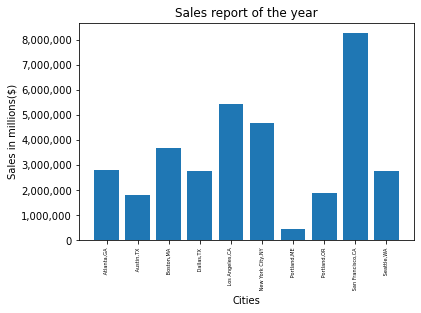

In [84]:
fig, ax = plt.subplots()
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, best_sales_city['Total sales'])
plt.xticks(cities,rotation=90, size = 5)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel('Sales in millions($)')
plt.xlabel('Cities')
plt.title('Sales report of the year')